In [2]:
!pip install pycaret
from pycaret.datasets import get_data
from pycaret.clustering import *
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
from pycaret.utils import version
version()

'3.2.0'

In [4]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [5]:
data = get_data('elections')

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [6]:
clustering_setup = setup(data)

,Description,Value
0,Session id,6683
1,Original data shape,"(3195, 54)"
2,Transformed data shape,"(3195, 2032)"
3,Numeric features,52
4,Categorical features,2
5,Rows with missing values,1.6%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [7]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(data)

,Description,Value
0,Session id,1231
1,Original data shape,"(3195, 54)"
2,Transformed data shape,"(3195, 2032)"
3,Numeric features,52
4,Categorical features,2
5,Rows with missing values,1.6%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [8]:
KMeanClusteringModel = create_model('kmeans', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9712,117319.6444,0.3388,0,0,0


In [9]:
kMeanPrediction = assign_model(KMeanClusteringModel)
kMeanPrediction

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,Cluster
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.100000,14.500000,...,28.799999,5319456312,4174286516,3917663456,12990,613795732,1046363,3.531906e+06,87.400002,Cluster 1
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.799999,15.300000,...,28.100000,112858843,52252752,57344851,12364,6426342,13369,5.064533e+04,94.400002,Cluster 2
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.200001,13.800000,...,31.700001,0,0,598175,12003,88157,131,5.944400e+02,91.800003,Cluster 0
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.200001,18.700001,...,27.299999,1410273,0,2966489,17166,436955,1384,1.589780e+03,114.599998,Cluster 0
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.200001,16.500000,...,27.000000,0,0,188337,6334,0,8,8.848800e+02,31.000000,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,45010,43806,2.7,43806,7.3,27.000000,9.500000,...,27.200001,0,437493,898189,22843,150439,227,1.042665e+04,4.200000,Cluster 0
3191,56039,Teton County,WY,22930,21294,7.7,21294,5.7,19.100000,12.200000,...,25.299999,0,0,515644,25688,327363,145,3.995380e+03,5.300000,Cluster 0
3192,56041,Uinta County,WY,20904,21118,-1.0,21118,7.6,29.799999,11.000000,...,15.900000,0,159375,413983,20626,35497,40,2.081260e+03,10.100000,Cluster 0
3193,56043,Washakie County,WY,8322,8533,-2.5,8533,5.5,23.900000,20.100000,...,26.900000,0,12128,98308,12596,10175,4,2.238550e+03,3.800000,Cluster 0


In [8]:
# from pycaret.clustering import *

# kMeanClusteringParameters = setup(data, verbose=False)
# KMeanClusteringModel = create_model('kmeans', num_clusters=4)
# kMeanPrediction = assign_model(KMeanClusteringModel)
# kMeanPrediction

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3627,1311.7687,0.9406,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Unnamed: 0.1,Unnamed: 0,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
0,0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Cluster 2
1,1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Cluster 2
2,2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Cluster 2
3,3,3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Cluster 2
4,4,4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,Cluster 1
796,796,796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,Cluster 1
797,797,797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,Cluster 1
798,798,798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,Cluster 1


In [11]:
birchClusteringParameters = setup(data, verbose=False)
birchClusteringModel = create_model('birch')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9622,97971.5580,0.3984,0,0,0


In [13]:

birchPrediction = assign_model(birchClusteringModel)
birchPrediction

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,Cluster
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.100000,14.500000,...,28.799999,5319456312,4174286516,3917663456,12990,613795732,1046363,3.531906e+06,87.400002,Cluster 3
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.799999,15.300000,...,28.100000,112858843,52252752,57344851,12364,6426342,13369,5.064533e+04,94.400002,Cluster 0
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.200001,13.800000,...,31.700001,0,0,598175,12003,88157,131,5.944400e+02,91.800003,Cluster 2
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.200001,18.700001,...,27.299999,1410273,0,2966489,17166,436955,1384,1.589780e+03,114.599998,Cluster 2
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.200001,16.500000,...,27.000000,0,0,188337,6334,0,8,8.848800e+02,31.000000,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,45010,43806,2.7,43806,7.3,27.000000,9.500000,...,27.200001,0,437493,898189,22843,150439,227,1.042665e+04,4.200000,Cluster 2
3191,56039,Teton County,WY,22930,21294,7.7,21294,5.7,19.100000,12.200000,...,25.299999,0,0,515644,25688,327363,145,3.995380e+03,5.300000,Cluster 2
3192,56041,Uinta County,WY,20904,21118,-1.0,21118,7.6,29.799999,11.000000,...,15.900000,0,159375,413983,20626,35497,40,2.081260e+03,10.100000,Cluster 2
3193,56043,Washakie County,WY,8322,8533,-2.5,8533,5.5,23.900000,20.100000,...,26.900000,0,12128,98308,12596,10175,4,2.238550e+03,3.800000,Cluster 2


In [14]:
hierarchicalClusteringParameters = setup(data, verbose=False)
hierarchicalClusteringModel = create_model('hclust', linkage='ward', affinity='euclidean')


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9622,97971.5580,0.3984,0,0,0


In [15]:
hierarchicalPrediction = assign_model(hierarchicalClusteringModel)
hierarchicalPrediction

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,Cluster
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.100000,14.500000,...,28.799999,5319456312,4174286516,3917663456,12990,613795732,1046363,3.531906e+06,87.400002,Cluster 3
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.799999,15.300000,...,28.100000,112858843,52252752,57344851,12364,6426342,13369,5.064533e+04,94.400002,Cluster 0
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.200001,13.800000,...,31.700001,0,0,598175,12003,88157,131,5.944400e+02,91.800003,Cluster 2
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.200001,18.700001,...,27.299999,1410273,0,2966489,17166,436955,1384,1.589780e+03,114.599998,Cluster 2
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.200001,16.500000,...,27.000000,0,0,188337,6334,0,8,8.848800e+02,31.000000,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,45010,43806,2.7,43806,7.3,27.000000,9.500000,...,27.200001,0,437493,898189,22843,150439,227,1.042665e+04,4.200000,Cluster 2
3191,56039,Teton County,WY,22930,21294,7.7,21294,5.7,19.100000,12.200000,...,25.299999,0,0,515644,25688,327363,145,3.995380e+03,5.300000,Cluster 2
3192,56041,Uinta County,WY,20904,21118,-1.0,21118,7.6,29.799999,11.000000,...,15.900000,0,159375,413983,20626,35497,40,2.081260e+03,10.100000,Cluster 2
3193,56043,Washakie County,WY,8322,8533,-2.5,8533,5.5,23.900000,20.100000,...,26.900000,0,12128,98308,12596,10175,4,2.238550e+03,3.800000,Cluster 2


In [16]:
X = save_model(KMeanClusteringModel, 'kMeanClusteringModelFile')

Transformation Pipeline and Model Successfully Saved


In [17]:
y=save_model(hierarchicalClusteringModel, 'hierarchicalClusteringModelfile')

Transformation Pipeline and Model Successfully Saved


In [18]:
z=save_model(birchClusteringModel, 'birchClusteringModelfile')

Transformation Pipeline and Model Successfully Saved


In [19]:
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9785,81056.9046,0.3493,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9712,117319.6444,0.3388,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9548,139821.0982,0.5008,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9513,141949.0340,0.5936,0,0,0


In [20]:
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9635,62673.9037,0.4819,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9622,97971.5580,0.3984,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9531,138960.6446,0.5044,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9531,135290.7822,0.6129,0,0,0


In [21]:
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)

print("For Cluster = 6")
x = create_model('birch', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9635,62673.9037,0.4819,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9622,97971.5580,0.3984,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9531,138960.6446,0.5044,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9531,135290.7822,0.6129,0,0,0


## Data Preprocessing

#### Normalization

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.2408,9.6718,1.4228,0,0,0


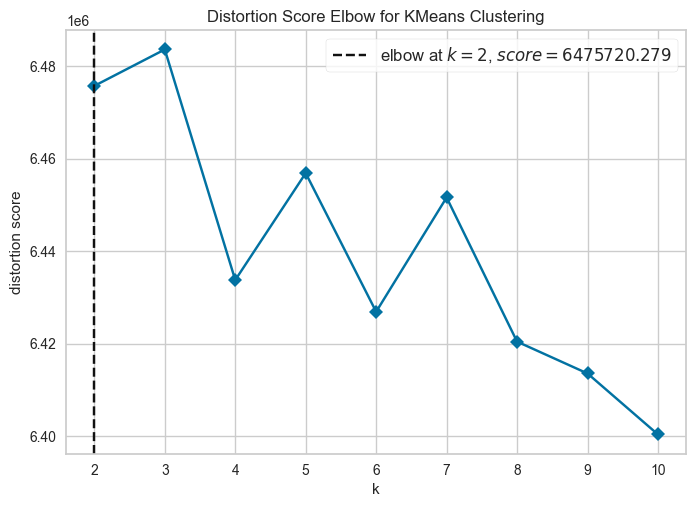

In [22]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [23]:
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1170,2.1284,1.1555,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.2408,9.6718,1.4228,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0103,4.3703,11.0926,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1843,6.4862,2.3624,0,0,0


In [24]:
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)

print("For Cluster = 6")
x = create_model('birch', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2869,16.1799,1.4695,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1096,12.5720,11.0097,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1085,10.4919,10.4258,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1025,9.2033,9.9554,0,0,0


In [25]:
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2869,16.1799,1.4695,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1096,12.5720,11.0097,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1085,10.4919,10.4258,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1025,9.2033,9.9554,0,0,0


#### Transformation

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5228,5317.5932,0.5639,0,0,0


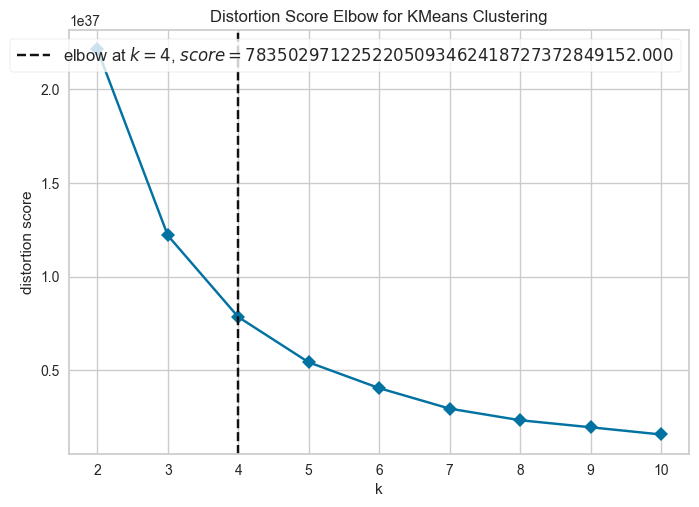

In [26]:
setup(data = data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [27]:
setup(data = data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5412,4559.6976,0.5918,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5230,5312.1798,0.5617,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5307,6128.0886,0.5462,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5220,6780.6577,0.5383,0,0,0


In [28]:
setup(data = data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)

print("For Cluster = 6")
x = create_model('birch', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5406,4519.4029,0.5861,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5263,4397.4232,0.5365,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4932,5384.4656,0.5499,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4892,6121.8288,0.5403,0,0,0


In [33]:
setup(data = data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5335,4526.4352,0.5996,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5081,4807.4125,0.5656,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5130,5372.9547,0.5660,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5213,6125.8730,0.5386,0,0,0


#### PCA

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9712,117319.6444,0.3388,0,0,0


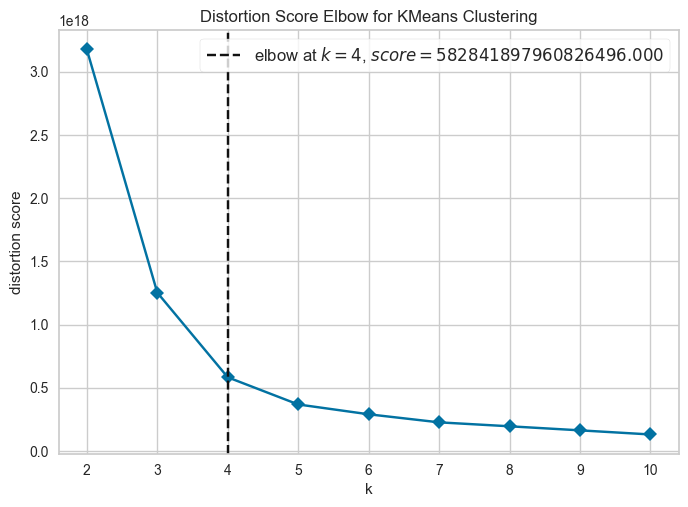

In [34]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [35]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9785,81056.9046,0.3493,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9712,117319.6444,0.3388,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9548,139821.0982,0.5008,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9513,141949.0340,0.5936,0,0,0


In [36]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)

print("For Cluster = 6")
x = create_model('birch', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9635,62673.9037,0.4819,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9622,97971.5580,0.3984,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9531,138960.6446,0.5044,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9531,135290.7822,0.6129,0,0,0


In [37]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9635,62673.9037,0.4819,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9622,97971.5580,0.3984,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9531,138960.6446,0.5044,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9531,135290.7822,0.6129,0,0,0


#### Transformation" + "Normalization

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.2329,8.4222,6.2537,0,0,0


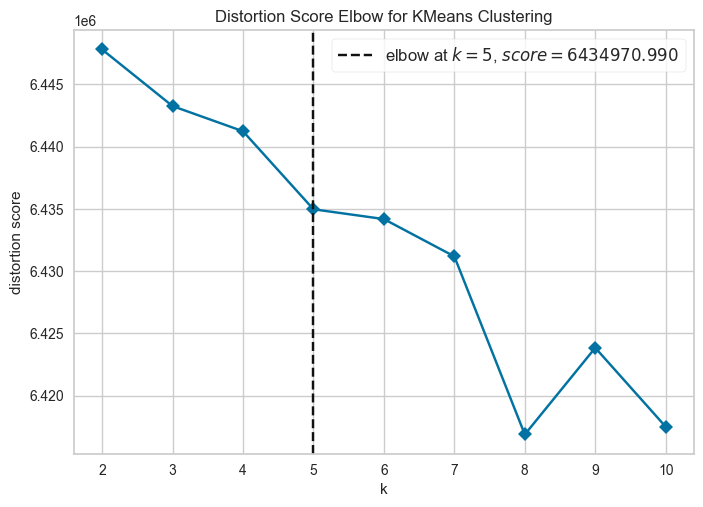

In [38]:
setup(data = data, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [39]:
setup(data = data, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0274,11.8183,7.1112,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0248,8.4578,5.8137,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0245,6.7700,4.7896,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1097,5.7386,4.1648,0,0,0


In [40]:
setup(data = data, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)

print("For Cluster = 6")
x = create_model('birch', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0826,7.9444,16.3154,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0543,6.6567,15.2798,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0545,5.9218,13.5921,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0170,5.4570,14.6493,0,0,0


In [41]:
setup(data = data, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0826,7.9444,16.3154,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0543,6.6567,15.2798,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0545,5.9218,13.5921,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0170,5.4570,14.6493,0,0,0


#### Transformation" + "Normalization" + "PCA

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0250,8.4330,5.8145,0,0,0


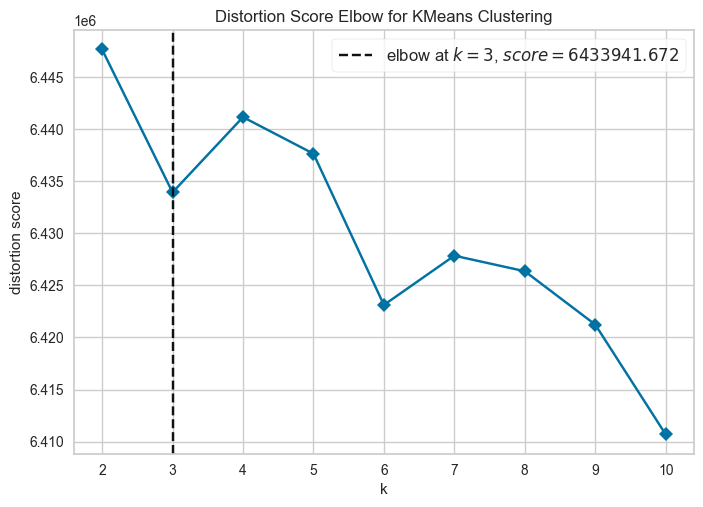

In [42]:
setup(data = data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [43]:
setup(data = data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore',
      transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0242,11.8245,7.5195,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0249,8.4300,5.8165,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1069,6.7272,5.0744,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1120,5.7176,4.3869,0,0,0


In [44]:
setup(data = data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)

print("For Cluster = 6")
x = create_model('birch', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0826,7.9444,16.3154,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0543,6.6567,15.2798,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0545,5.9218,13.5921,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0170,5.4570,14.6493,0,0,0


In [45]:
setup(data = data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0826,7.9444,16.3154,0,0,0


For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0543,6.6567,15.2798,0,0,0


For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0545,5.9218,13.5921,0,0,0


For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0170,5.4570,14.6493,0,0,0


In [46]:
import pandas as pd

kmeans_results = {
    'No Preprocessing': {
        3: {'Silhouette': 0.9785, 'Calinski-Harabasz': 81056.9046, 'Davies-Bouldin': 0.3493},
        4: {'Silhouette': 0.9712, 'Calinski-Harabasz': 117319.6444, 'Davies-Bouldin': 0.3388},
        5: {'Silhouette': 0.9548, 'Calinski-Harabasz': 139821.0982, 'Davies-Bouldin': 0.5008},
        6: {'Silhouette': 0.9513, 'Calinski-Harabasz': 141949.0340, 'Davies-Bouldin': 0.5936}
    },
    'Normalization': {
        3: {'Silhouette': -0.1170, 'Calinski-Harabasz': 2.1284, 'Davies-Bouldin': 1.1555},
        4: {'Silhouette': -0.2408, 'Calinski-Harabasz': 9.6718, 'Davies-Bouldin': 1.4228},
        5: {'Silhouette': -0.0103, 'Calinski-Harabasz': 4.3703, 'Davies-Bouldin': 11.0926},
        6: {'Silhouette': -0.1843, 'Calinski-Harabasz': 6.4862, 'Davies-Bouldin': 2.3624}
    },
    'Transformation': {
        3: {'Silhouette': 0.5412, 'Calinski-Harabasz': 4559.6976, 'Davies-Bouldin': 0.5918},
        4: {'Silhouette': 0.5230, 'Calinski-Harabasz': 5312.1798, 'Davies-Bouldin': 0.5617},
        5: {'Silhouette': 0.5307, 'Calinski-Harabasz': 6128.0886, 'Davies-Bouldin': 0.5462},
        6: {'Silhouette': 0.5220, 'Calinski-Harabasz': 6780.6577, 'Davies-Bouldin': 0.5383}
    },
    'PCA': {
        3: {'Silhouette': 0.9785, 'Calinski-Harabasz': 81056.9046, 'Davies-Bouldin': 0.3493},
        4: {'Silhouette': 0.9712, 'Calinski-Harabasz': 117319.6444, 'Davies-Bouldin': 0.3388},
        5: {'Silhouette': 0.9548, 'Calinski-Harabasz': 139821.0982, 'Davies-Bouldin': 0.5008},
        6: {'Silhouette': 0.9513, 'Calinski-Harabasz': 141949.0340, 'Davies-Bouldin': 0.5936}
    },
    'Transformation + Normalization': {
        3: {'Silhouette': 0.0274, 'Calinski-Harabasz': 11.8183, 'Davies-Bouldin': 7.1112},
        4: {'Silhouette': 0.0248, 'Calinski-Harabasz': 8.4578, 'Davies-Bouldin': 5.8137},
        5: {'Silhouette': 0.0245, 'Calinski-Harabasz': 6.7700, 'Davies-Bouldin': 4.7896},
        6: {'Silhouette': -0.1097, 'Calinski-Harabasz': 5.7386, 'Davies-Bouldin': 4.1648}
    },
    'Transformation + Normalization + PCA': {
        3: {'Silhouette': 0.0242, 'Calinski-Harabasz': 11.8245, 'Davies-Bouldin': 7.5195},
        4: {'Silhouette': 0.0249, 'Calinski-Harabasz': 8.4300, 'Davies-Bouldin': 5.8165},
        5: {'Silhouette': -0.1069, 'Calinski-Harabasz': 6.7272, 'Davies-Bouldin': 5.0744},
        6: {'Silhouette': -0.1120, 'Calinski-Harabasz': 5.7176, 'Davies-Bouldin': 4.3869}
    }
}

# Create a DataFrame for each algorithm
kmeans_df = pd.DataFrame()

for preprocessing, values in kmeans_results.items():
    preprocessing_df = pd.DataFrame(values).T
    preprocessing_df.insert(0, 'Preprocessing', preprocessing)
    kmeans_df = pd.concat([kmeans_df, preprocessing_df], axis=0)

# Save to CSV
kmeans_df.to_csv('kmeans_result.csv', index=True)


In [47]:
import pandas as pd
from tabulate import tabulate

# Read the CSV file
df = pd.read_csv('kmeans_result.csv')

# Display the DataFrame using tabulate for a more beautiful format
print(tabulate(df, headers='keys', tablefmt='pretty'))


+----+------------+--------------------------------------+------------+-------------------+----------------+
|    | Unnamed: 0 |            Preprocessing             | Silhouette | Calinski-Harabasz | Davies-Bouldin |
+----+------------+--------------------------------------+------------+-------------------+----------------+
| 0  |     3      |           No Preprocessing           |   0.9785   |    81056.9046     |     0.3493     |
| 1  |     4      |           No Preprocessing           |   0.9712   |    117319.6444    |     0.3388     |
| 2  |     5      |           No Preprocessing           |   0.9548   |    139821.0982    |     0.5008     |
| 3  |     6      |           No Preprocessing           |   0.9513   |    141949.034     |     0.5936     |
| 4  |     3      |            Normalization             |   -0.117   |      2.1284       |     1.1555     |
| 5  |     4      |            Normalization             |  -0.2408   |      9.6718       |     1.4228     |
| 6  |     5      |

In [48]:
import pandas as pd

# Sample results for hierarchical clustering (replace with your actual results)
hierarchical_results = {
    'No Preprocessing': {
        3: {'Silhouette': 0.9635, 'Calinski-Harabasz': 62673.9037, 'Davies-Bouldin': 0.4819},
        4: {'Silhouette': 0.9622, 'Calinski-Harabasz': 97971.5580, 'Davies-Bouldin': 0.3984},
        5: {'Silhouette': 0.9531, 'Calinski-Harabasz': 138960.6446, 'Davies-Bouldin': 0.5044},
        6: {'Silhouette': 0.9531, 'Calinski-Harabasz': 135290.7822, 'Davies-Bouldin': 0.6129}
    },
    'Normalization': {
        3: {'Silhouette': 0.2869, 'Calinski-Harabasz': 16.1799, 'Davies-Bouldin': 1.4695},
        4: {'Silhouette': 0.1096, 'Calinski-Harabasz': 12.5720, 'Davies-Bouldin': 11.0097},
        5: {'Silhouette': 0.1085, 'Calinski-Harabasz': 10.4919, 'Davies-Bouldin': 10.4258},
        6: {'Silhouette': 0.1025, 'Calinski-Harabasz': 9.2033, 'Davies-Bouldin': 9.9554}
    },
    'Transformation': {
        3: {'Silhouette': 0.5335, 'Calinski-Harabasz': 4526.4352, 'Davies-Bouldin': 0.5996},
        4: {'Silhouette': 0.5081, 'Calinski-Harabasz': 4807.4125, 'Davies-Bouldin': 0.5656},
        5: {'Silhouette': 0.5130, 'Calinski-Harabasz': 5372.9547, 'Davies-Bouldin': 0.5660},
        6: {'Silhouette': 0.5213, 'Calinski-Harabasz': 6125.8730, 'Davies-Bouldin': 0.5386}
    },
    'PCA': {
        3: {'Silhouette': 0.9635, 'Calinski-Harabasz': 62673.9037, 'Davies-Bouldin': 0.4819},
        4: {'Silhouette': 0.9622, 'Calinski-Harabasz': 97971.5580, 'Davies-Bouldin': 0.3984},
        5: {'Silhouette': 0.9531, 'Calinski-Harabasz': 138960.6446, 'Davies-Bouldin': 0.5044},
        6: {'Silhouette': 0.9531, 'Calinski-Harabasz': 135290.7822, 'Davies-Bouldin': 0.6129}
    },
    'Transformation + Normalization': {
        3: {'Silhouette': 0.0826, 'Calinski-Harabasz': 7.9444, 'Davies-Bouldin': 16.3154},
        4: {'Silhouette': 0.0543, 'Calinski-Harabasz': 6.6567, 'Davies-Bouldin': 15.2798},
        5: {'Silhouette': 0.0545, 'Calinski-Harabasz': 5.9218, 'Davies-Bouldin': 13.5921},
        6: {'Silhouette': -0.0170, 'Calinski-Harabasz': 5.4570, 'Davies-Bouldin': 14.6493}
    },
    'Transformation + Normalization + PCA': {
        3: {'Silhouette': 0.9635, 'Calinski-Harabasz': 62673.9037, 'Davies-Bouldin': 0.4819},
        4: {'Silhouette': 0.9622, 'Calinski-Harabasz': 97971.5580, 'Davies-Bouldin': 0.3984},
        5: {'Silhouette': 0.9531, 'Calinski-Harabasz': 138960.6446, 'Davies-Bouldin': 0.5044},
        6: {'Silhouette': 0.9531, 'Calinski-Harabasz': 135290.7822, 'Davies-Bouldin': 0.6129}
    },
}

# Create a DataFrame for each algorithm
hierarchical_df = pd.DataFrame()

for preprocessing, values in hierarchical_results.items():
    preprocessing_df = pd.DataFrame(values).T
    preprocessing_df.insert(0, 'Preprocessing', preprocessing)
    hierarchical_df = pd.concat([hierarchical_df, preprocessing_df], axis=0)

# Save to CSV
hierarchical_df.to_csv('hierarchical_resultss.csv', index=True)


In [49]:
# Read the CSV file
dff = pd.read_csv('hierarchical_resultss.csv')

# Display the DataFrame using tabulate for a more beautiful format
print(tabulate(dff, headers='keys', tablefmt='pretty'))

+----+------------+--------------------------------------+------------+-------------------+----------------+
|    | Unnamed: 0 |            Preprocessing             | Silhouette | Calinski-Harabasz | Davies-Bouldin |
+----+------------+--------------------------------------+------------+-------------------+----------------+
| 0  |     3      |           No Preprocessing           |   0.9635   |    62673.9037     |     0.4819     |
| 1  |     4      |           No Preprocessing           |   0.9622   |     97971.558     |     0.3984     |
| 2  |     5      |           No Preprocessing           |   0.9531   |    138960.6446    |     0.5044     |
| 3  |     6      |           No Preprocessing           |   0.9531   |    135290.7822    |     0.6129     |
| 4  |     3      |            Normalization             |   0.2869   |      16.1799      |     1.4695     |
| 5  |     4      |            Normalization             |   0.1096   |      12.572       |    11.0097     |
| 6  |     5      |

In [50]:
import pandas as pd

# Sample results for Birch clustering (replace with your actual results)
birch_results = {
    'No Preprocessing': {
        3: {'Silhouette': 0.9635, 'Calinski-Harabasz': 62673.9037, 'Davies-Bouldin': 0.4819},
        4: {'Silhouette': 0.9622, 'Calinski-Harabasz': 97971.5580, 'Davies-Bouldin': 0.3984},
        5: {'Silhouette': 0.9531, 'Calinski-Harabasz': 138960.6446, 'Davies-Bouldin': 0.5044},
        6: {'Silhouette': 0.9531, 'Calinski-Harabasz': 135290.7822, 'Davies-Bouldin': 0.6129}
    },
    'Normalization': {
        3: {'Silhouette': 0.2869, 'Calinski-Harabasz': 16.1799, 'Davies-Bouldin': 1.4695},
        4: {'Silhouette': 0.1096, 'Calinski-Harabasz': 12.5720, 'Davies-Bouldin': 11.0097},
        5: {'Silhouette': 0.1085, 'Calinski-Harabasz': 10.4919, 'Davies-Bouldin': 10.4258},
        6: {'Silhouette': 0.1025, 'Calinski-Harabasz': 9.2033, 'Davies-Bouldin': 9.9554}
    },
    'Transformation': {
        3: {'Silhouette': 0.5406, 'Calinski-Harabasz': 4519.4029, 'Davies-Bouldin': 0.5861},
        4: {'Silhouette': 0.5263, 'Calinski-Harabasz': 4397.4232, 'Davies-Bouldin': 0.5365},
        5: {'Silhouette': 0.4932, 'Calinski-Harabasz': 5384.4656, 'Davies-Bouldin': 0.5499},
        6: {'Silhouette': 0.4892, 'Calinski-Harabasz': 6121.8288, 'Davies-Bouldin': 0.5403}
    },
    'PCA': {
        3: {'Silhouette': 0.9635, 'Calinski-Harabasz': 62673.9037, 'Davies-Bouldin': 0.4819},
        4: {'Silhouette': 0.9622, 'Calinski-Harabasz': 97971.5580, 'Davies-Bouldin': 0.3984},
        5: {'Silhouette': 0.9531, 'Calinski-Harabasz': 138960.6446, 'Davies-Bouldin': 0.5044},
        6: {'Silhouette': 0.9531, 'Calinski-Harabasz': 135290.7822, 'Davies-Bouldin': 0.6129}
    },
    'Transformation + Normalization': {
        3: {'Silhouette': 0.0826, 'Calinski-Harabasz': 7.9444, 'Davies-Bouldin': 16.3154},
        4: {'Silhouette': 0.0543, 'Calinski-Harabasz': 6.6567, 'Davies-Bouldin': 15.2798},
        5: {'Silhouette': 0.0545, 'Calinski-Harabasz': 5.9218, 'Davies-Bouldin': 13.5921},
        6: {'Silhouette': -0.0170, 'Calinski-Harabasz': 5.4570, 'Davies-Bouldin': 14.6493}
    },
    'Transformation + Normalization + PCA': {
        3: {'Silhouette': 0.0826, 'Calinski-Harabasz': 7.9444, 'Davies-Bouldin': 16.3154},
        4: {'Silhouette': 0.0543, 'Calinski-Harabasz': 6.6567, 'Davies-Bouldin': 15.2798},
        5: {'Silhouette': 0.0545, 'Calinski-Harabasz': 5.9218, 'Davies-Bouldin': 13.5921},
        6: {'Silhouette': -0.0170, 'Calinski-Harabasz': 5.4570, 'Davies-Bouldin': 14.6493}
    },
}

# Create a DataFrame for each algorithm
birch_df = pd.DataFrame()

for preprocessing, values in birch_results.items():
    preprocessing_df = pd.DataFrame(values).T
    preprocessing_df.insert(0, 'Preprocessing', preprocessing)
    birch_df = pd.concat([birch_df, preprocessing_df], axis=0)

# # Display the final DataFrame for Birch clustering
# print("Results for Birch clustering:")
# print(birch_df)

# Save to CSV
birch_df.to_csv('birch_results.csv', index=True)


In [53]:
# Read the CSV file
dfff = pd.read_csv('birch_results.csv')

# Display the DataFrame using tabulate for a more beautiful format
print(tabulate(dfff, headers='keys', tablefmt='pretty'))

+----+------------+--------------------------------------+------------+-------------------+----------------+
|    | Unnamed: 0 |            Preprocessing             | Silhouette | Calinski-Harabasz | Davies-Bouldin |
+----+------------+--------------------------------------+------------+-------------------+----------------+
| 0  |     3      |           No Preprocessing           |   0.9635   |    62673.9037     |     0.4819     |
| 1  |     4      |           No Preprocessing           |   0.9622   |     97971.558     |     0.3984     |
| 2  |     5      |           No Preprocessing           |   0.9531   |    138960.6446    |     0.5044     |
| 3  |     6      |           No Preprocessing           |   0.9531   |    135290.7822    |     0.6129     |
| 4  |     3      |            Normalization             |   0.2869   |      16.1799      |     1.4695     |
| 5  |     4      |            Normalization             |   0.1096   |      12.572       |    11.0097     |
| 6  |     5      |